<a href="https://colab.research.google.com/github/Frixon21/CPSC-483-Introduction-to-Machine-Learning/blob/main/CPSC_483_Spring_2025_Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

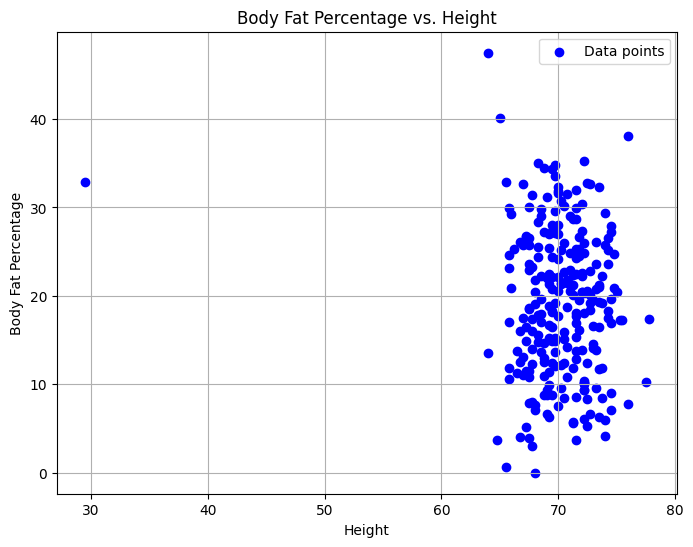

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv('bodyfat.csv')

# Plot BodyFat (y-axis, dependent variable) vs. Height (x-axis, independent variable)
plt.figure(figsize=(8, 6))
plt.scatter(df['Height'], df['BodyFat'], color='blue', label='Data points')
plt.xlabel('Height')
plt.ylabel('Body Fat Percentage')
plt.title('Body Fat Percentage vs. Height')
plt.legend()
plt.grid(True)
plt.show()


In [3]:
min_height = df['Height'].min()
print("Minimum Height (outlier):", min_height)

df_clean = df[df['Height'] != min_height]

mean_height = df_clean['Height'].mean()
print("Mean Height after removal:", mean_height)

Minimum Height (outlier): 29.5
Mean Height after removal: 70.31075697211155


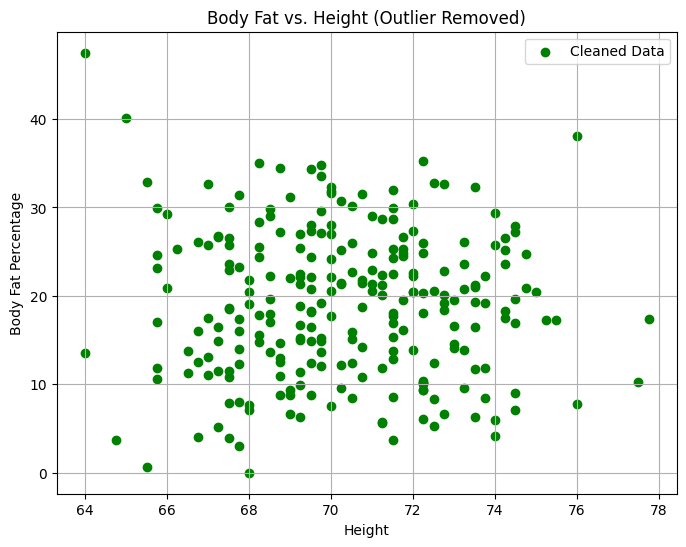

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Height'], df_clean['BodyFat'], color='green', label='Cleaned Data')
plt.xlabel('Height')
plt.ylabel('Body Fat Percentage')
plt.title('Body Fat vs. Height (Outlier Removed)')
plt.legend()
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1362
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.712
Time:                        18:55:37   Log-Likelihood:                -887.97
No. Observations:                 251   AIC:                             1780.
Df Residuals:                     249   BIC:                             1787.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3412     14.221      1.712      0.0

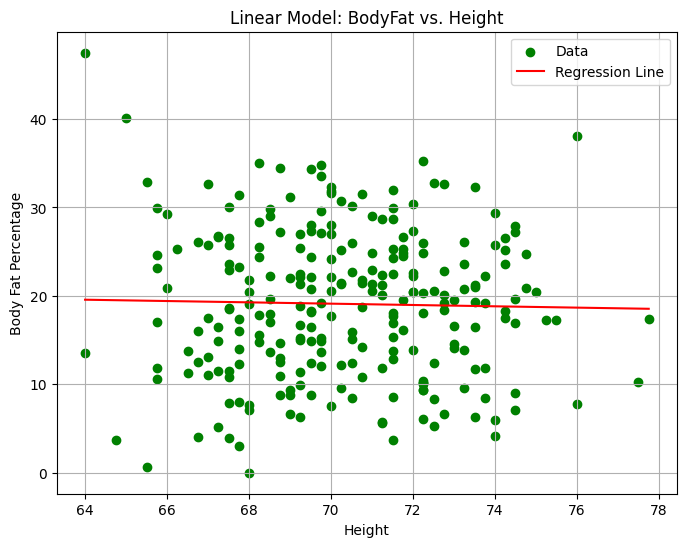

In [5]:
import statsmodels.formula.api as smf
import numpy as np

model = smf.ols("BodyFat ~ Height", data=df_clean).fit()
print(model.summary())

intercept = model.params['Intercept']
slope = model.params['Height']
r_squared = model.rsquared

print(f"Linear Equation: BodyFat = {intercept:.4f} + {slope:.4f} * Height")
print(f"R-squared: {r_squared:.4f}")

plt.figure(figsize=(8,6))
plt.scatter(df_clean['Height'], df_clean['BodyFat'], color='green', label='Data')
plt.xlabel('Height')
plt.ylabel('Body Fat Percentage')
plt.title('Linear Model: BodyFat vs. Height')

x_vals = np.linspace(df_clean['Height'].min(), df_clean['Height'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()

In [7]:
model_weight = smf.ols("BodyFat ~ Weight", data=df_clean).fit()

intercept = model_weight.params['Intercept']
slope = model_weight.params['Weight']
r_squared = model_weight.rsquared

print(f"Linear Equation: BodyFat = {intercept:.4f} + {slope:.4f} * Weight")
print(f"R-squared: {r_squared:.4f}")

Linear Equation: BodyFat = -11.8889 + 0.1733 * Weight
R-squared: 0.3731


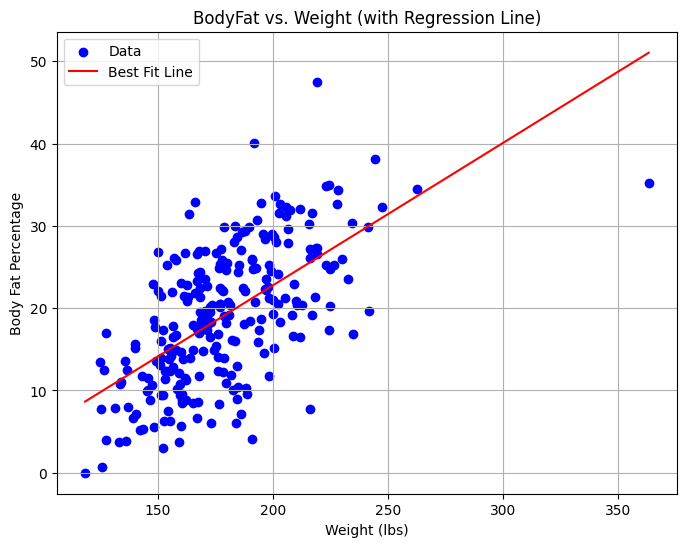

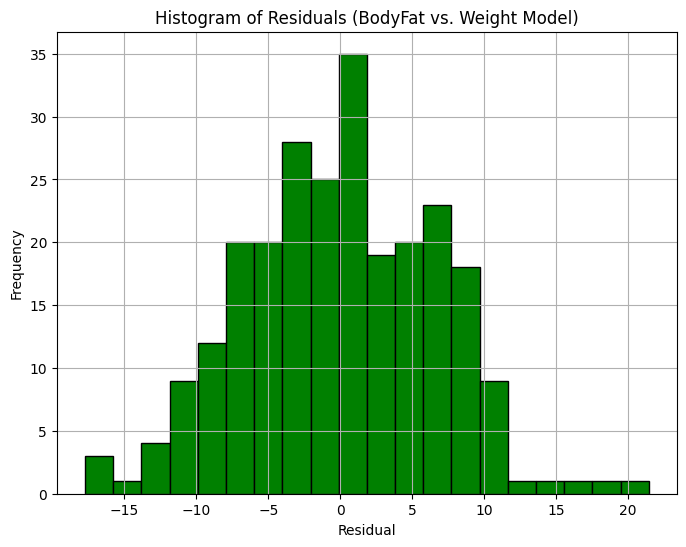

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['Weight'], df_clean['BodyFat'], color='blue', label='Data')

x_vals = np.linspace(df_clean['Weight'].min(), df_clean['Weight'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Best Fit Line')

plt.xlabel('Weight (lbs)')
plt.ylabel('Body Fat Percentage')
plt.title('BodyFat vs. Weight (with Regression Line)')
plt.legend()
plt.grid(True)
plt.show()

residuals = model_weight.resid
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='green', edgecolor='black')
plt.title('Histogram of Residuals (BodyFat vs. Weight Model)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [10]:
test_weights = pd.DataFrame({'Weight': [150, 300]})
predictions = model_weight.predict(test_weights)
print("Predicted BodyFat:")
for w, p in zip(test_weights['Weight'], predictions):
    print(f"Weight {w} lbs -> BodyFat = {p:.4f}")

Predicted BodyFat:
Weight 150 lbs -> BodyFat = 14.1022
Weight 300 lbs -> BodyFat = 40.0933


In [11]:
model_WH = smf.ols("BodyFat ~ Weight + Height", data=df_clean).fit()

r_squared = model_WH.rsquared
print(f"R-squared: {r_squared:.4f}")


R-squared: 0.5094


In [12]:
intercept = model_WH.params['Intercept']
coef_weight = model_WH.params['Weight']
coef_height = model_WH.params['Height']
print(f"Equation: BodyFat = {intercept:.4f} + {coef_weight:.4f} * Weight + {coef_height:.4f} * Height")

Equation: BodyFat = 72.5244 + 0.2319 * Weight + -1.3498 * Height


In [13]:
test_data = pd.DataFrame({
    'Weight': [150, 300],
    'Height': [70, 70]
})
predictions = model_WH.predict(test_data)
for i, (w, h, bf) in enumerate(zip(test_data['Weight'], test_data['Height'], predictions)):
    print(f"Person {chr(ord('A') + i)}: Weight={w}, Height={h} -> Predicted BodyFat = {bf:.4f}")

Person A: Weight=150, Height=70 -> Predicted BodyFat = 12.8307
Person B: Weight=300, Height=70 -> Predicted BodyFat = 47.6225


In [16]:
df_clean = df[df['Height'] != df['Height'].min()].copy()
df_clean['BMI'] = df_clean['Weight'] / (df_clean['Height'] ** 2)

model_bmi = smf.ols("BodyFat ~ BMI", data=df_clean).fit()

intercept = model_bmi.params['Intercept']
slope = model_bmi.params['BMI']
r_squared = model_bmi.rsquared

print(f"Linear Equation: BodyFat = {intercept:.4f} + {slope:.4f} * BMI")
print(f"R-squared: {r_squared:.4f}")


Linear Equation: BodyFat = -22.8594 + 1161.9732 * BMI
R-squared: 0.5255


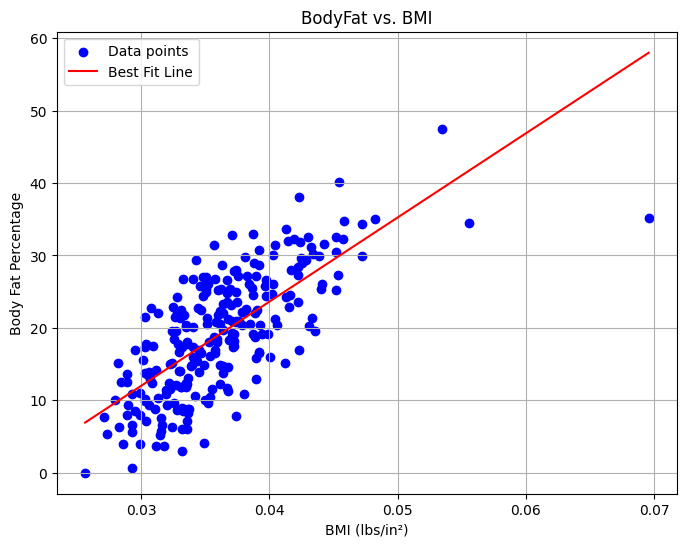

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(df_clean['BMI'], df_clean['BodyFat'], color='blue', label='Data points')

x_vals = np.linspace(df_clean['BMI'].min(), df_clean['BMI'].max(), 100)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', label='Best Fit Line')

plt.xlabel('BMI (lbs/in²)')
plt.ylabel('Body Fat Percentage')
plt.title('BodyFat vs. BMI')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
height = 70  # inches
bmi_A = 150 / (height ** 2)
bmi_B = 300 / (height ** 2)

test_data = pd.DataFrame({
    'BMI': [bmi_A, bmi_B]
})
predictions = model_bmi.predict(test_data)

print("Predicted BodyFat using the simple BMI transformation:")
print(f"Person A (150 lbs, 70 in): BMI = {bmi_A:.5f} -> Predicted BodyFat = {predictions.iloc[0]:.4f}")
print(f"Person B (300 lbs, 70 in): BMI = {bmi_B:.5f} -> Predicted BodyFat = {predictions.iloc[1]:.4f}")


Predicted BodyFat using the simple BMI transformation:
Person A (150 lbs, 70 in): BMI = 0.03061 -> Predicted BodyFat = 12.7112
Person B (300 lbs, 70 in): BMI = 0.06122 -> Predicted BodyFat = 48.2819


In [19]:
print("\nDiscussion on BMI units:")
print("The BMI we calculated above uses Weight in pounds and Height in inches, i.e.:")
print("   BMI_simple = Weight / (Height**2)")
print("The 'correct' BMI (in SI units) is defined as:")
print("   BMI_correct = (Weight/2.20) / ((Height*0.0254)**2)")
print("Since (Weight/2.20) and (Height*0.0254) are just constant rescalings of Weight and Height,")
print("BMI_correct is linearly related to BMI_simple by a constant factor. Therefore, although the")
print("numerical values of the regression coefficients (intercept and slope) would change, the overall")
print("relationship between BMI and BodyFat (and the R-squared) would remain essentially the same.")


Discussion on BMI units:
The BMI we calculated above uses Weight in pounds and Height in inches, i.e.:
   BMI_simple = Weight / (Height**2)
The 'correct' BMI (in SI units) is defined as:
   BMI_correct = (Weight/2.20) / ((Height*0.0254)**2)
Since (Weight/2.20) and (Height*0.0254) are just constant rescalings of Weight and Height,
BMI_correct is linearly related to BMI_simple by a constant factor. Therefore, although the
numerical values of the regression coefficients (intercept and slope) would change, the overall
relationship between BMI and BodyFat (and the R-squared) would remain essentially the same.


In [20]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_clean = df[df['Height'] != df['Height'].min()].copy()
df_clean['AgeGroup'] = pd.cut(df_clean['Age'],
                              bins=[0, 40, 60, float('Inf')],
                              labels=['Young', 'Middle', 'Senior'])

print("Data with AgeGroup:")
print(df_clean[['Age', 'AgeGroup']].head())

Data with AgeGroup:
   Age AgeGroup
0   23    Young
1   22    Young
2   22    Young
3   26    Young
4   24    Young


In [31]:
df_clean['BMI'] = df_clean['Weight'] / (df_clean['Height'] ** 2)
ct = ColumnTransformer([
    ("agegroup_ohe", OneHotEncoder(categories=[['Young', 'Middle', 'Senior']],
                                   drop='first', sparse_output =False), ['AgeGroup'])
], remainder='passthrough')
transformed = ct.fit_transform(df_clean[['AgeGroup', 'BMI']])
ohe = ct.named_transformers_['agegroup_ohe']
agegroup_feature_names = ohe.get_feature_names_out(['AgeGroup'])
col_names = list(agegroup_feature_names) + ['BMI']
df_transformed = pd.DataFrame(transformed, columns=col_names, index=df_clean.index)
df_model = df_transformed.join(df_clean[['BodyFat']])
print("\nTransformed data (first few rows):")
print(df_model.head())



Transformed data (first few rows):
   AgeGroup_Middle  AgeGroup_Senior       BMI  BodyFat
0              0.0              0.0  0.033605     12.3
1              0.0              0.0  0.033189      6.1
2              0.0              0.0  0.035087     25.3
3              0.0              0.0  0.035392     10.4
4              0.0              0.0  0.036294     28.7


In [35]:
X = df_model[['BMI', 'AgeGroup_Middle', 'AgeGroup_Senior']]
X = sm.add_constant(X)
y = df_model['BodyFat']

model_age = sm.OLS(y, X).fit()
r2_model_age = model_age.rsquared
print(f"\nR-squared of the model with BMI and AgeGroup: {r2_model_age:.4f}")


R-squared of the model with BMI and AgeGroup: 0.5700


In [37]:
intercept = model_age.params['const']
beta_bmi = model_age.params['BMI']
print(f"\nFor AgeGroup = 'Young', the equation is:")
print(f"   BodyFat = {intercept:.4f} + {beta_bmi:.4f} * BMI")


For AgeGroup = 'Young', the equation is:
   BodyFat = -22.8344 + 1105.0576 * BMI


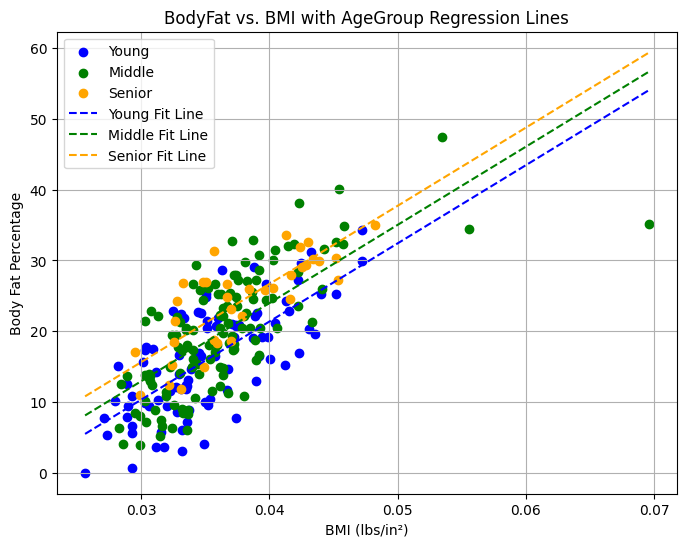

In [38]:
plt.figure(figsize=(8,6))

colors = {'Young': 'blue', 'Middle': 'green', 'Senior': 'orange'}

for group, color in colors.items():
    subset = df_clean[df_clean['AgeGroup'] == group]
    plt.scatter(subset['BMI'], subset['BodyFat'], color=color, label=group)

bmi_range = np.linspace(df_clean['BMI'].min(), df_clean['BMI'].max(), 100)
const = model_age.params['const']
beta_bmi = model_age.params['BMI']
beta_middle = model_age.params.get('AgeGroup_Middle', 0)
beta_senior = model_age.params.get('AgeGroup_Senior', 0)

plt.plot(bmi_range, const + beta_bmi * bmi_range, color='blue', linestyle='--', label='Young Fit Line')

plt.plot(bmi_range, (const + beta_middle) + beta_bmi * bmi_range, color='green', linestyle='--', label='Middle Fit Line')

plt.plot(bmi_range, (const + beta_senior) + beta_bmi * bmi_range, color='orange', linestyle='--', label='Senior Fit Line')

plt.xlabel('BMI (lbs/in²)')
plt.ylabel('Body Fat Percentage')
plt.title('BodyFat vs. BMI with AgeGroup Regression Lines')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

df_model = df_clean.copy()
cols_to_drop = ['BodyFat', 'Density', 'AgeGroup']
df_model.drop(columns=cols_to_drop, inplace=True, errors='ignore')

X = df_model.values
feature_names = df_model.columns.tolist()

y = df_clean['BodyFat'].values

In [40]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

coefs = []
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

In [43]:
print("Coefficients for each alpha:\n")
print("Feature names:", feature_names)
for alpha, coef_array in zip(alpha_values, coefs):
    coef_str = ", ".join(f"{c: .4f}" for c in coef_array)
    print(f"alpha={alpha: .4f}: [{coef_str}]")

Coefficients for each alpha:

Feature names: ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist', 'BMI']
alpha= 0.0001: [ 0.8817, -13.0134,  4.9807, -1.0888, -0.6796,  9.7469, -2.0653,  1.2723,  0.2155,  0.2057,  0.5800,  0.7307, -1.6104,  10.5012]
alpha= 0.0010: [ 0.8767, -12.4892,  4.7283, -1.0907, -0.6515,  9.7502, -2.0285,  1.2615,  0.2037,  0.2064,  0.5738,  0.7371, -1.6038,  9.9990]
alpha= 0.0100: [ 0.8262, -7.2740,  2.2177, -1.1090, -0.3718,  9.7818, -1.6614,  1.1536,  0.0868,  0.2127,  0.5115,  0.8007, -1.5384,  5.0040]
alpha= 0.1000: [ 0.7340, -0.2249, -0.6499, -0.9491, -0.0000,  8.3231, -0.4830,  0.1467,  0.0000,  0.0000,  0.1114,  0.6706, -1.4210, -0.0000]
alpha= 1.0000: [ 0.0235,  0.0000, -0.3033, -0.0000,  0.0000,  5.8163,  0.0000,  0.0000,  0.0000, -0.0000,  0.0000,  0.0000, -0.0000,  0.0000]
alpha= 10.0000: [ 0.0000,  0.0000, -0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000, 

In [44]:
shrink_order = {}
for i, fname in enumerate(feature_names):
    zero_index = None
    for j, alpha in enumerate(alpha_values):
        if abs(coefs[j][i]) < 1e-8:  # approximate zero
            zero_index = alpha
            break
    shrink_order[fname] = zero_index

shrink_sorted = sorted(shrink_order.items(), key=lambda x: (x[1] is None, x[1]))
print("\nOrder in which coefficients go to zero:")
for feat, a in shrink_sorted:
    if a is None:
        print(f"  {feat} never went to zero in this alpha range")
    else:
        print(f"  {feat} -> first zero at alpha={a}")


Order in which coefficients go to zero:
  Chest -> first zero at alpha=0.1
  Knee -> first zero at alpha=0.1
  Ankle -> first zero at alpha=0.1
  BMI -> first zero at alpha=0.1
  Weight -> first zero at alpha=1.0
  Neck -> first zero at alpha=1.0
  Hip -> first zero at alpha=1.0
  Thigh -> first zero at alpha=1.0
  Biceps -> first zero at alpha=1.0
  Forearm -> first zero at alpha=1.0
  Wrist -> first zero at alpha=1.0
  Age -> first zero at alpha=10.0
  Height -> first zero at alpha=10.0
  Abdomen -> first zero at alpha=10.0


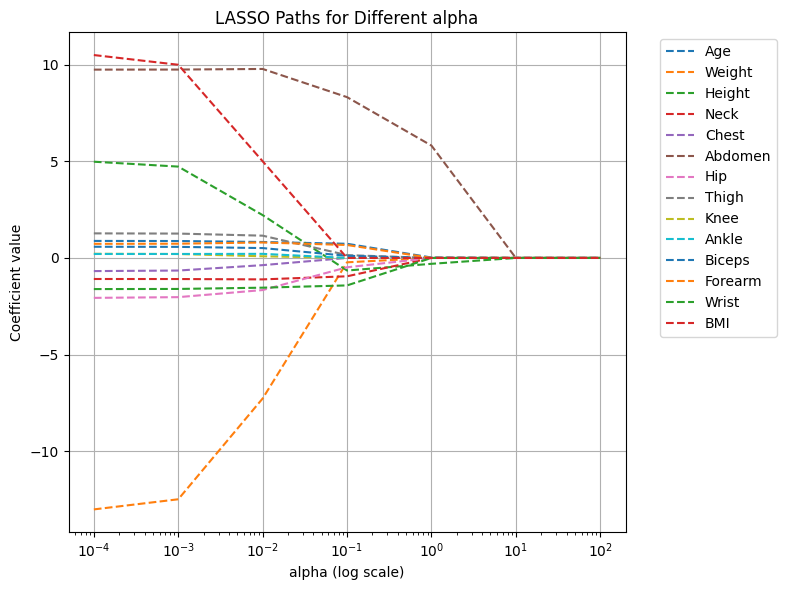

In [45]:
plt.figure(figsize=(8,6))
for i, fname in enumerate(feature_names):
    coef_path = [coef_set[i] for coef_set in coefs]
    plt.plot(alpha_values, coef_path, label=fname, linestyle='--')
plt.xscale('log')
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('LASSO Paths for Different alpha')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()